<a href="https://colab.research.google.com/github/Dharshaan24/NutriClass/blob/main/Copy_of_NutriClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn pandas numpy matplotlib seaborn xgboost imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_food_dataset_imbalanced.csv to synthetic_food_dataset_imbalanced.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [ ]:
target_col = "Meal_Type"


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])


In [ ]:
df[target_col].value_counts()


,count
Meal_Type,
3,8001
0,7970
1,7873
2,7856


In [ ]:
X = df.drop(columns=["Meal_Type", "Food_Name", "Preparation_Method"])
y = df["Meal_Type"]


In [ ]:
X = df.drop(columns=["Meal_Type", "Food_Name", "Preparation_Method"])
y = df["Meal_Type"]


In [ ]:
X.head()


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,False,False
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,False,True
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,False,False
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,False,True
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy="mean")
X_train_raw = pd.DataFrame(imputer.fit_transform(X_train_raw), columns=X_train_raw.columns)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_raw, y_train_raw)

print("Before SMOTE:\n", y_train_raw.value_counts())
print("After SMOTE:\n", y_train.value_counts())


Before SMOTE:
 Meal_Type
3    6401
0    6376
1    6298
2    6285
Name: count, dtype: int64
After SMOTE:
 Meal_Type
2    6401
0    6401
1    6401
3    6401
Name: count, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_raw = pd.DataFrame(imputer.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
X_train_raw = X_train_raw.fillna(0)
X_test = X_test.fillna(0)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train_raw = pd.DataFrame(imputer.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_raw, y_train_raw)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_raw, y_train_raw)

print("Before SMOTE:\n", y_train_raw.value_counts())
print("After SMOTE:\n", y_train.value_counts())


Before SMOTE:
 Meal_Type
3    6401
0    6376
1    6298
2    6285
Name: count, dtype: int64
After SMOTE:
 Meal_Type
2    6401
0    6401
1    6401
3    6401
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds[name] = model.predict(X_test)
    print(name, "DONE")

RandomForest DONE
DecisionTree DONE
KNN DONE
SVM DONE
GradientBoosting DONE
XGBoost DONE


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()



===== RandomForest =====
Accuracy: 0.25425867507886435

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.28      0.27      1594
           1       0.26      0.26      0.26      1575
           2       0.24      0.23      0.23      1571
           3       0.25      0.25      0.25      1600

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.25      6340
weighted avg       0.25      0.25      0.25      6340



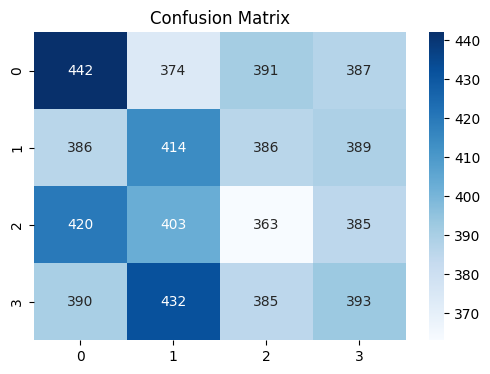


===== DecisionTree =====
Accuracy: 0.2553627760252366

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.26      0.26      1594
           1       0.26      0.25      0.25      1575
           2       0.26      0.26      0.26      1571
           3       0.25      0.25      0.25      1600

    accuracy                           0.26      6340
   macro avg       0.26      0.26      0.26      6340
weighted avg       0.26      0.26      0.26      6340



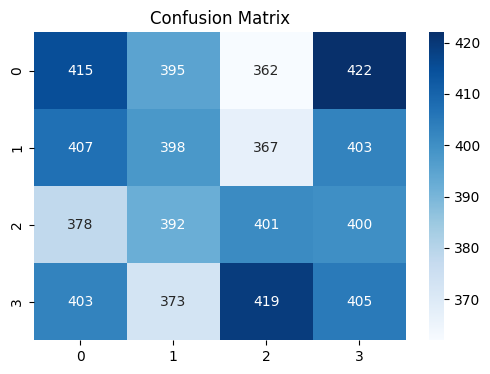


===== KNN =====
Accuracy: 0.25173501577287066

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.33      0.29      1594
           1       0.25      0.28      0.26      1575
           2       0.27      0.25      0.26      1571
           3       0.24      0.15      0.18      1600

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.25      6340
weighted avg       0.25      0.25      0.25      6340



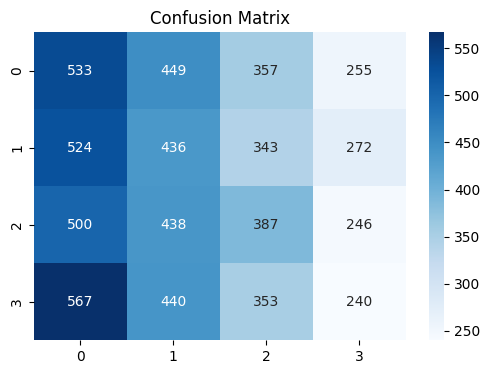


===== SVM =====
Accuracy: 0.25110410094637226

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.25      0.26      1594
           1       0.23      0.23      0.23      1575
           2       0.25      0.28      0.26      1571
           3       0.25      0.25      0.25      1600

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.25      6340
weighted avg       0.25      0.25      0.25      6340



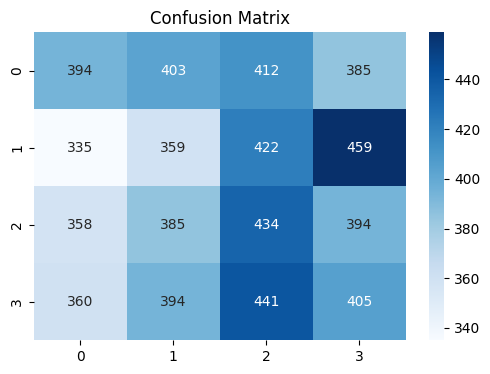


===== GradientBoosting =====
Accuracy: 0.2471608832807571

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.25      0.25      1594
           1       0.24      0.26      0.25      1575
           2       0.24      0.24      0.24      1571
           3       0.25      0.24      0.25      1600

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.25      6340
weighted avg       0.25      0.25      0.25      6340



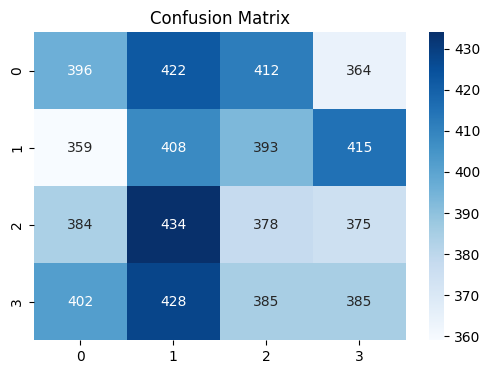


===== XGBoost =====
Accuracy: 0.25378548895899056

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.27      0.27      1594
           1       0.24      0.24      0.24      1575
           2       0.25      0.25      0.25      1571
           3       0.26      0.26      0.26      1600

    accuracy                           0.25      6340
   macro avg       0.25      0.25      0.25      6340
weighted avg       0.25      0.25      0.25      6340



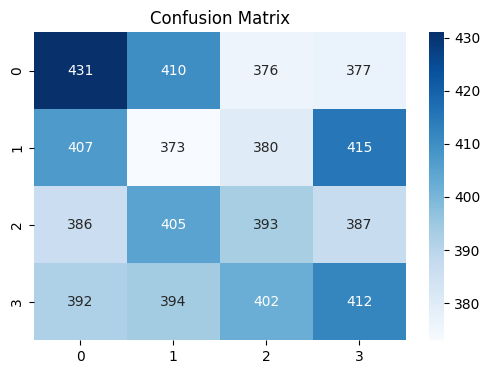

In [ ]:
for name, pred in preds.items():
    print("\n=====", name, "=====")
    evaluate(y_test, pred)


           Feature  Importance
0         Calories    0.093978
2              Fat    0.093911
9    Water_Content    0.093530
10    Serving_Size    0.092888
1          Protein    0.092582
6           Sodium    0.092178
4            Sugar    0.090690
3            Carbs    0.090539
8   Glycemic_Index    0.090297
5            Fiber    0.086472
7      Cholesterol    0.081453
12  Is_Gluten_Free    0.001280
11        Is_Vegan    0.000202


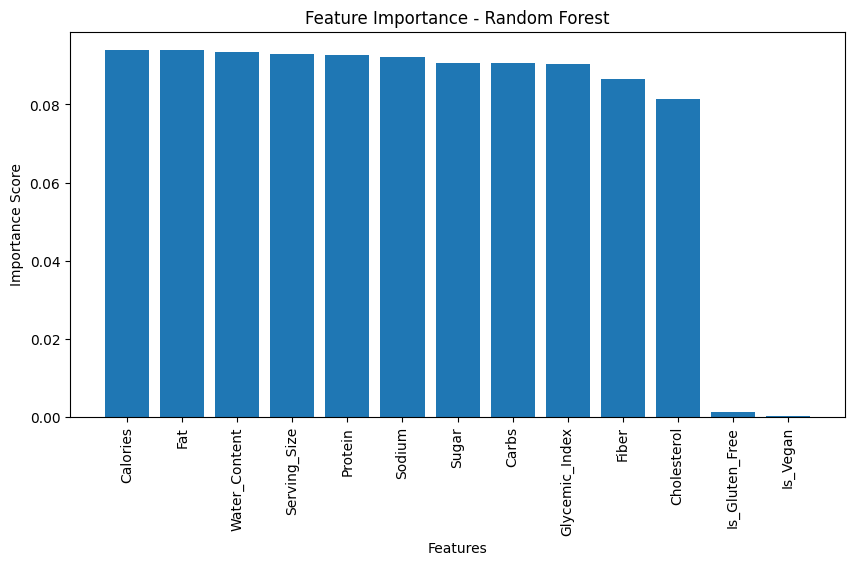

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest again (if not already trained)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance values
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi_df)

# Plot
plt.figure(figsize=(10,5))
plt.bar(fi_df["Feature"], fi_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
top5 = fi_df.head(5)
top5

,Feature,Importance
0,Calories,0.093978
2,Fat,0.093911
9,Water_Content,0.093530
10,Serving_Size,0.092888
1,Protein,0.092582


In [ ]:
accuracies = {name: accuracy_score(y_test, pred) for name, pred in preds.items()}
accuracies


{'RandomForest': 0.25425867507886435,
 'DecisionTree': 0.2553627760252366,
 'KNN': 0.25173501577287066,
 'SVM': 0.25110410094637226,
 'GradientBoosting': 0.2471608832807571,
 'XGBoost': 0.25378548895899056}

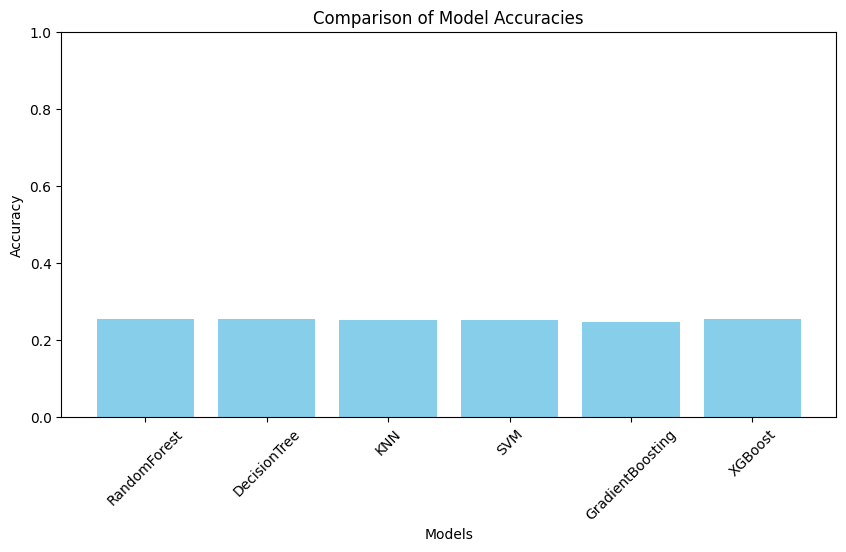

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # accuracy scale (0–1)
plt.show()


In [ ]:
best_model_name = max(accuracies, key=accuracies.get)
print("Best Model:", best_model_name)


Best Model: DecisionTree


In [ ]:
import joblib
import os

# Get the actual trained model (NOT the model name)
best_model = models[best_model_name]

# Save files
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

# Verify saved files
print(os.listdir())


['.config', 'label_encoder.pkl', 'synthetic_food_dataset_imbalanced.csv', 'scaler.pkl', 'best_model.pkl', 'sample_data']
